In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import rebound

morado = '#8033cc' # morado
azul = '#3380cc' # azul
amarillo = '#FDB813' # amarillo

%matplotlib inline

# Ejemplo paso a pasito

In [2]:
"""Características de la simulación"""

sim1 = rebound.Simulation()        # sim1 será el nombre de nuestra primer
                                   # simulación
sim1.units = ('AU', 'yr', 'Msun')  # Unidades que queremos usar
sim1.integrator = "whfast"         # Integrador de REBOUND
sim1.dt = 0.001                    # Tamaño del paso de integración
tmax = 1                           # Tiempo de la simulación
N = 50                             # Número de salidas
tiempos = np.linspace(0., tmax, N) # Momentos en que generará las salidas

In [3]:
"""Cuerpos a incluir en la simulación"""

# Estrella central
sim1.add(m=1.0)
# Nuestro planeta
sim1.add(m=3*10**-6,a=1.0,e=0.9,inc=0,Omega=0.,omega=0.,f=0.)  # Planeta de una masa terrestre

In [4]:
sim1.status()

---------------------------------
REBOUND version:     	3.12.2
REBOUND built on:    	Jul 27 2020 13:25:56
Number of particles: 	2
Selected integrator: 	whfast
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.Particle object, m=3e-06 x=0.09999999999999998 y=0.0 z=0.0 vx=0.0 vy=27.387293626623517 vz=0.0>
---------------------------------


In [5]:
"""Arreglos para almacenar la información"""

t = []      
xEstrella, yEstrella, zEstrella = [],[],[]
xPlaneta, yPlaneta, zPlaneta = [],[],[]

In [6]:
"""Haciendo la integración"""

for i,tiempo in enumerate(tiempos):
    
    sim1.integrate(tiempo)
    t.append(tiempo)
    
    # Con este ciclo guardaremos la información de la posición
    j = 0
    for p in sim1.particles:
        if j == 0: # Posición de la Estrella
            xEstrella.append(p.x)
            yEstrella.append(p.y)
            zEstrella.append(p.z)
        if j == 1: # Posición del Planeta
            xPlaneta.append(p.x)
            yPlaneta.append(p.y)
            zPlaneta.append(p.z)
        j = j + 1

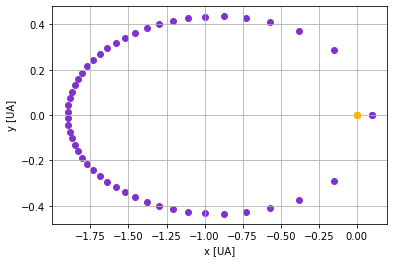

In [7]:
fig, ax = plt.subplots()
ax.grid(True)
ax.scatter(xEstrella, yEstrella, color = amarillo)
ax.scatter(xPlaneta, yPlaneta, color = morado)
ax.set_xlabel('x [UA]')
ax.set_ylabel('y [UA]');

# Haciéndolo rápido con una función

In [8]:
def orbita(m,a,e,inc,Omega,omega,f):
    
    # Características de la simulación
    
    sim = rebound.Simulation()
    sim.units = ('AU', 'yr', 'Msun')   # Unidades que queremos usar
    sim.integrator = "whfast"          # Integrador de REBOUND
    sim.dt = 0.001                     # Tamaño del paso de integración
    tmax = a**(3./2.)                  # Tiempo de la sim (periodo orbital)
    N = 500                            # Número de salidas
    tiempos = np.linspace(0., tmax, N) # Momentos en que generará las salidas
    
    # Objetos en la simulación
    sim.add(m=1.0)
    sim.add(m=m,a=a,e=e,inc=inc,Omega=Omega,omega=omega,f=f)

    # Arreglos para la info
    
    xPlaneta, yPlaneta, zPlaneta = [],[],[]
    
    # Haciendo la integración
    
    for i,tiempo in enumerate(tiempos):
    
        sim.integrate(tiempo)
        t.append(tiempo)

        j = 0
        for p in sim.particles:
            if j == 1: 
                xPlaneta.append(p.x)
                yPlaneta.append(p.y)
                zPlaneta.append(p.z)
            j = j + 1
        
    return xPlaneta, yPlaneta, zPlaneta 

## Variando la excentricidad

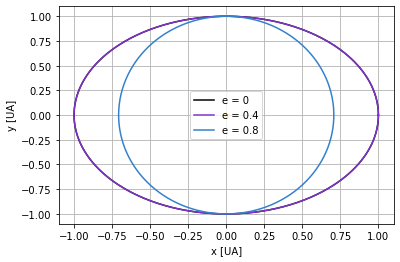

In [12]:
fig, ax = plt.subplots()
ax.grid(True)
# Estrella
ax.plot(0.,0.,'*',color = amarillo)

# Planeta 1
orbita1 = orbita(m=3*10**-6,a=1.0,e=0.,inc=0.,Omega=0.,omega=0.,f=0.)
ax.plot(orbita1[0], orbita1[1], color = '#000000', label = 'e = 0')

# Planeta 2
orbita2 = orbita(m=3*10**-6,a=1.0,e=0,inc=0.,Omega=np.pi/4,omega=0.,f=0.)
ax.plot(orbita2[0], orbita2[1], color = morado, label = 'e = 0.4')

# Planeta 3
orbita3 = orbita(m=3*10**-6,a=1.0,e=0,inc=np.pi/4.,Omega=np.pi/2.,omega=0.,f=0.)
ax.plot(orbita3[0], orbita3[1], color = azul, label = 'e = 0.8')

ax.legend(loc = 'best')
ax.set_xlabel('x [UA]')
ax.set_ylabel('y [UA]');


## Variando $\omega$

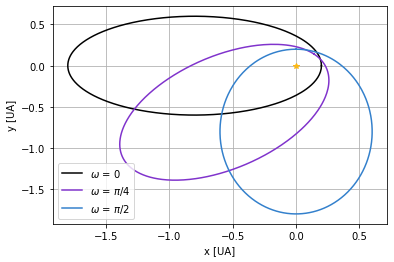

In [19]:
fig, ax = plt.subplots()
ax.grid(True)
# Estrella
ax.plot(0.,0.,'*',color = amarillo)

# Planeta 1
orbita1 = orbita(m=3*10**-6,a=1.0,e=0.8,inc=0.,Omega=0.,omega=0.*np.pi/4.,f=0.)
ax.plot(orbita1[0], orbita1[1], color = '#000000', label = '$\omega$ = 0')

# Planeta 2
orbita2 = orbita(m=3*10**-6,a=1.0,e=0.8,inc=0.,Omega=0.,omega=1.*np.pi/4.,f=0.)
ax.plot(orbita2[0], orbita2[1], color = morado, label = '$\omega$ = $\pi$/4')

# Planeta 3
orbita3 = orbita(m=3*10**-6,a=1.0,e=0.8,inc=0.,Omega=0.,omega=2.*np.pi/4.,f=0.)
ax.plot(orbita3[0], orbita3[1], color = azul, label = '$\omega$ = $\pi$/2')

ax.legend(loc = 'best')
ax.set_xlabel('x [UA]')
ax.set_ylabel('y [UA]');

## Variando más elementos orbitales

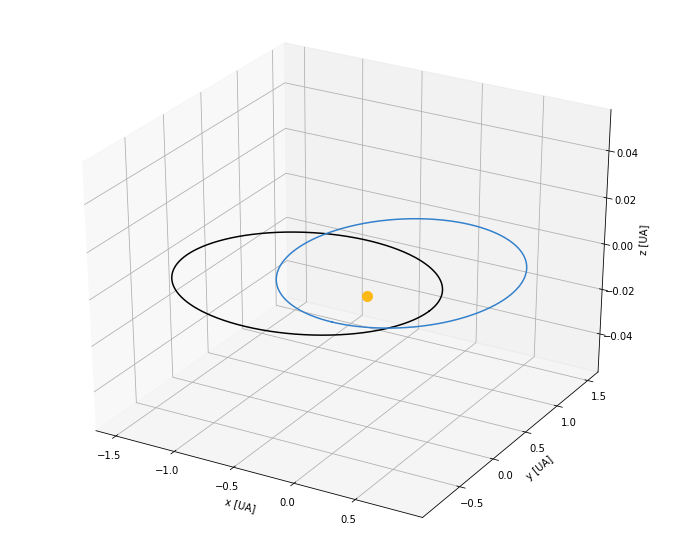

In [41]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

# Estrella
ax.scatter(0.,0.,0.,'*',color = amarillo, s = 100)

# Planeta 1
orbita1 = orbita(m=3*10**-6,a=1.0,e=0.5,inc=0.,Omega=0.,omega=0.,f=0.)
ax.plot(orbita1[0], orbita1[1], orbita1[2], color = '#000000')

# Planeta 2
#orbita2 = orbita(m=3*10**-6,a=1.0,e=0.5,inc=np.pi/4,Omega=0*np.pi/4,omega=0.,f=0.)
#ax.plot(orbita2[0], orbita2[1], orbita2[2], color = amarillo)

orbita2 = orbita(m=3*10**-6,a=1.0,e=0.5,inc=0*np.pi/4,Omega=4*np.pi/4,omega=np.pi/2.,f=0.)
ax.plot(orbita2[0], orbita2[1], orbita2[2], color = azul)
#
#orbita2 = orbita(m=3*10**-6,a=1.0,e=0.5,inc=np.pi/4,Omega=2*np.pi/4,omega=0.,f=0.)
#ax.plot(orbita2[0], orbita2[1], orbita2[2], color = azul)

#orbita2 = orbita(m=3*10**-6,a=1.0,e=0.5,inc=np.pi/4,Omega=3*np.pi/2,omega=0.,f=0.)
#ax.plot(orbita2[0], orbita2[1], orbita2[2], color = morado)

#ax.set_xlim(-2,2)
#ax.set_ylim(-2,2)
#ax.set_zlim(-2,2)
ax.set_xlabel('x [UA]')
ax.set_ylabel('y [UA]')
ax.set_zlabel('z [UA]');